# Skript: 09_06_XGBoost_boston_datensatz


### Lernziele:

- Umgang mit Beispieldaten in der Sklearn-ML-Bibliotheken
- Aufbereitung und verstehen: Boston-Datensatz / Pandas Data Frame
- 

#### Linear Regression / "Kleinste Quadrate"

#### Beispiel Boston - Datensatz

Datensatzquelle sklearn

In [1]:
# Module laden
import numpy as np
import pandas as pd
#import mglearn
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
# Normalisierungsfunktionalität laden
from sklearn import preprocessing

import xgboost as xgb
from sklearn.metrics import mean_squared_error


### Boston - Datensatz

Der Boston Datensatz enthält Merkmale zu verschiedenen Wohngegenden in Boston mit den dazu gehörigen   
Wohnungspreisen.   
Ziel ist die Vorhersage von Wohnungspreisen in Abhängkeit von diesen Merkmalen.  

Die Merkmals-Attribute sowie die Ziel-Variable sind alle numerisch.

Die Input-Attribute:
- **CRIM** per capita crime rate by town
- **ZN** proportion of residential land zoned for lots over 25,000 sq.ft.
- **INDUS** proportion of non-retail business acres per town
- **CHAS** Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
- **NOX** nitric oxides concentration (parts per 10 million)
- **RM** average number of rooms per dwelling
- **AGE** proportion of owner-occupied units built prior to 1940
- **DIS** weighted distances to five Boston employment centres
- **RAD** index of accessibility to radial highways
- **TAX** full-value property-tax rate per 10,000 Dollar
- **PTRATIO** pupil-teacher ratio by town
- **B** 1000(Bk - **0.63)^2 where Bk is the proportion of blacks by town
- **LSTAT** % lower status of the population
- **MEDV** Median value of owner-occupied homes in $1000’s

### Daten laden

Der Datensatz wird als Beispiel-Datensatz in der Bibliothek **sklearn** mitgeliefert.  
Die Beispielsätze in dieser Bibliothek sind nicht als einfache CSV-Dateien abgelegt, sondern in einer   
sog. **Bunch-Struktur**.   
In dieser Struktur sind z. B. Input- und Ziel-Variable schon getrennt voneinander. Man kann sie also getrennt abgreifen.

In [2]:
#  Daten laden 
from sklearn.datasets import load_boston
boston = load_boston()
type(boston)

sklearn.utils.Bunch

### Verstehen der Daten / Inhalte anschaulich machen / Bunch-Struktur der Beispieldaten auflösen

In [3]:
print("Keys: ",boston.keys())
print("Struktur: ",boston.data.shape)
print("Attribut-Namen: ",boston.feature_names)
print("Ziel-Variable: ", boston.target)

Keys:  dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])
Struktur:  (506, 13)
Attribut-Namen:  ['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']
Ziel-Variable:  [24.  21.6 34.7 33.4 36.2 28.7 22.9 27.1 16.5 18.9 15.  18.9 21.7 20.4
 18.2 19.9 23.1 17.5 20.2 18.2 13.6 19.6 15.2 14.5 15.6 13.9 16.6 14.8
 18.4 21.  12.7 14.5 13.2 13.1 13.5 18.9 20.  21.  24.7 30.8 34.9 26.6
 25.3 24.7 21.2 19.3 20.  16.6 14.4 19.4 19.7 20.5 25.  23.4 18.9 35.4
 24.7 31.6 23.3 19.6 18.7 16.  22.2 25.  33.  23.5 19.4 22.  17.4 20.9
 24.2 21.7 22.8 23.4 24.1 21.4 20.  20.8 21.2 20.3 28.  23.9 24.8 22.9
 23.9 26.6 22.5 22.2 23.6 28.7 22.6 22.  22.9 25.  20.6 28.4 21.4 38.7
 43.8 33.2 27.5 26.5 18.6 19.3 20.1 19.5 19.5 20.4 19.8 19.4 21.7 22.8
 18.8 18.7 18.5 18.3 21.2 19.2 20.4 19.3 22.  20.3 20.5 17.3 18.8 21.4
 15.7 16.2 18.  14.3 19.2 19.6 23.  18.4 15.6 18.1 17.4 17.1 13.3 17.8
 14.  14.4 13.4 15.6 11.8 13.8 15.6 14.6 17.8 15.4 21.5 19.6 15.3 19.4
 17

In [ ]:
# Die allgemeine Beschreibung
print(boston.DESCR)

In einer überschaulichen Tabelle kann man sich die Daten besser vorstellen.   
Deswegen überführen wir die Daten in eine Pandas - Tabelle.  


In [7]:
# Als pandas data frame aufbereiten / das muss nicht sein, es macht das Ganze aber anschaulicher


# Daten übernehmen
data = pd.DataFrame(boston.data)

# Spalten-Namen aufbauen 
data.columns = boston.feature_names

# Ziel-Variable hinzufügen
data['PRICE'] = boston.target

# anzeigen
data

CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0    0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1    0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2    0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3    0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4    0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   
..       ...   ...    ...   ...    ...    ...   ...     ...  ...    ...   
501  0.06263   0.0  11.93   0.0  0.573  6.593  69.1  2.4786  1.0  273.0   
502  0.04527   0.0  11.93   0.0  0.573  6.120  76.7  2.2875  1.0  273.0   
503  0.06076   0.0  11.93   0.0  0.573  6.976  91.0  2.1675  1.0  273.0   
504  0.10959   0.0  11.93   0.0  0.573  6.794  89.3  2.3889  1.0  273.0   
505  0.04741   0.0  11.93   0.0  0.573  6.030  80.8  2.5050  1.0  273.0   

     PTRATIO       B  LSTAT  PRICE  
0       15.3  396.90   4.98   24.0  
1       17.8  396.90   9.14   21.6  
2       17.8  392.83   4.03   34.7  
3       18.7  394.63   2.94   33.4  
4       18.7  396.90   5.33   36.2  
..       ...     ...    ...    ...  
501     21.0  391.99   9.67   22.4  
502     21.0  396.90   9.08   20.6  
503     21.0  396.90   5.64   23.9  
504     21.0  393.45   6.48   22.0  
505     21.0  396.90   7.88   11.9  

[506 rows x 14 columns]

### Schnell-Übersicht zu allen Werte-Verteilungen

In [38]:
data.describe()

CRIM          ZN       INDUS        CHAS         NOX          RM  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean     3.613524   11.363636   11.136779    0.069170    0.554695    6.284634   
std      8.601545   23.322453    6.860353    0.253994    0.115878    0.702617   
min      0.006320    0.000000    0.460000    0.000000    0.385000    3.561000   
25%      0.082045    0.000000    5.190000    0.000000    0.449000    5.885500   
50%      0.256510    0.000000    9.690000    0.000000    0.538000    6.208500   
75%      3.677083   12.500000   18.100000    0.000000    0.624000    6.623500   
max     88.976200  100.000000   27.740000    1.000000    0.871000    8.780000   

              AGE         DIS         RAD         TAX     PTRATIO           B  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean    68.574901    3.795043    9.549407  408.237154   18.455534  356.674032   
std     28.148861    2.105710    8.707259  168.537116    2.164946   91.294864   
min      2.900000    1.129600    1.000000  187.000000   12.600000    0.320000   
25%     45.025000    2.100175    4.000000  279.000000   17.400000  375.377500   
50%     77.500000    3.207450    5.000000  330.000000   19.050000  391.440000   
75%     94.075000    5.188425   24.000000  666.000000   20.200000  396.225000   
max    100.000000   12.126500   24.000000  711.000000   22.000000  396.900000   

            LSTAT  
count  506.000000  
mean    12.653063  
std      7.141062  
min      1.730000  
25%      6.950000  
50%     11.360000  
75%     16.955000  
max     37.970000

In [39]:
data['PRICE'] = boston.target

In [40]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
CRIM       506 non-null float64
ZN         506 non-null float64
INDUS      506 non-null float64
CHAS       506 non-null float64
NOX        506 non-null float64
RM         506 non-null float64
AGE        506 non-null float64
DIS        506 non-null float64
RAD        506 non-null float64
TAX        506 non-null float64
PTRATIO    506 non-null float64
B          506 non-null float64
LSTAT      506 non-null float64
PRICE      506 non-null float64
dtypes: float64(14)
memory usage: 55.5 KB


Trennen Input-Variablen und Ziel - Variable

In [11]:
X, y = data.iloc[:,:-1],data.iloc[:,-1]

Umwandeln der Variablen in eine für den Algorithmus passende Form

In [12]:
data_dmatrix = xgb.DMatrix(data=X,label=y)

### Erstellen Trainings- Test-Datenbestand / Funktion *train_test_split()*

Allgemein gilt folgende Variablen-Benennung:   
- X_train  &nbsp;&nbsp;     Input-Variablen Trainingssätze
- X_test   &nbsp;&nbsp;     Input-Variablen Testsätze
- y_train  &nbsp;&nbsp;     Ziel-Variable Trainingssätze
- y_test   &nbsp;&nbsp;     Ziel-Variable Testsätze

In [13]:
# Test-/Trainingssätze erstellen
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

XGBRegressor initialisieren - Eine Modell-Instanz erzeugen. Über diese Modell-Instanz wird weiter gearbeitet

**Die Parameter**  

- **learning_rate:** zum Verhindern des Overfitting . *Wählbarer Bereich [0,1]*
- **max_depth:** maximale Baumtiefe pro Durchlauf
- **subsample:** Prozentanteil der Beispiele pro Baum. *Ein zu geringer Wert führt zum Underfitting*
- **colsample_bytree:** Prozentanteil der Features pro Baum. *Ein hoher Wert führt zum Overfitting*
- **n_estimators:** Anzahl Bäume, die erstellt werden sollen
- **objective:** Welche *loss function* soll genutzt werden (loss function: siehe nächster Block)

**Welche loss functions gibt es?**
- **reg:linear** für Regressions- Aufgaben
- **reg:logistic**  für Classification Aufgaben mit *decision*
- **binary:logistic**  für Classification Aufgaben mit *probability*

**Die folgenden Regularisierungs-Varianten gibt es**
- **gamma:**  Kontrolliert wie weit ein Baum-Knoten nach dem Anwenden der loss-Funktion weiter aufgesplittet wird.  
*Ein höherer Wert führt zu weniger Splits*
- **alpha:** L1 Regulierer auf den Leaf-Knoten. *Ein hoher Werte führt zu mehr Regularisierung*
- **lambda:** L2 Regulierer auf den Leaf-Knoten.  

Alle Parameter hier: *https://xgboost.readthedocs.io/en/latest/parameter.html#general-parameters*


In [14]:
xg_reg = xgb.XGBRegressor(objective ='reg:linear', colsample_bytree = 0.3, learning_rate = 0.1,
                max_depth = 5, alpha = 10, n_estimators = 10)

### Modell erstellen / trainieren und die "Prediction" für die Testdaten erstellen

In [15]:
# Modell trainieren
xg_reg.fit(X_train,y_train)

# Prediction auf die Testdaten
preds = xg_reg.predict(X_test)

[13:46:14] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


#### RMSE-Wert berechnen

In [50]:
rmse = np.sqrt(mean_squared_error(y_test, preds))
print("RMSE: %f" % (rmse))

RMSE: 10.170035


### k-fold Cross Validation mit XGBoost

Bei der *k-fold Cross Validation* nimmt der Algorithmus nacheinander unterschiedliche Beispielausschnitte aus den zu analysierenden Daten. Damit wird verhindert, dass bestimmte Werte-Konstellationen sich besonders stark auf das Modell niederschlagen.  
Overfitting wird minimiert und das Modell kann besser generalisieren.

**Die Parameter der cv()-Methode**

- **num_boost_round:** Anzahl der Bäume (analog n_estimators)
- **metrics:** Welche Metrik soll genutzt werden z. B. rmse
- **as_pandas:** erzeugt ein Pandas-Objekt als Ergebnis
- **early_stopping_rounds** beendet, wenn der rmse-Wert sich nicht verbessert
- **seed:**  Seed-Wert um vergleichbare Wiederholungen zu gewährleisten

In [51]:
params = {"objective":"reg:linear",'colsample_bytree': 0.3,'learning_rate': 0.1,
                'max_depth': 5, 'alpha': 10}

cv_results = xgb.cv(dtrain=data_dmatrix, params=params, nfold=3,
                    num_boost_round=50,early_stopping_rounds=10,metrics="rmse", as_pandas=True, seed=123)

[11:23:10] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[11:23:10] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[11:23:10] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [55]:
cv_results

train-rmse-mean  train-rmse-std  test-rmse-mean  test-rmse-std
0         21.750760        0.036149       21.765523       0.028850
1         19.778533        0.077649       19.830758       0.031761
2         18.052812        0.118632       18.157338       0.116036
3         16.458958        0.169187       16.623974       0.191413
4         15.074781        0.183547       15.254608       0.213611
5         13.791091        0.216905       14.031675       0.250689
6         12.588550        0.184166       12.855077       0.235383
7         11.595904        0.184369       11.918407       0.259773
8         10.630265        0.156457       11.017993       0.236795
9          9.824976        0.202503       10.252325       0.269036
10         9.081573        0.151426        9.564405       0.248442
11         8.445415        0.201162        8.981438       0.280135
12         7.821793        0.150274        8.405444       0.262750
13         7.351428        0.162784        7.988541       0.268936
14         6.913529        0.138568        7.595556       0.275594
15         6.519526        0.166408        7.261678       0.303747
16         6.063112        0.152205        6.883890       0.294064
17         5.725739        0.189042        6.592061       0.286842
18         5.398780        0.169921        6.307457       0.230042
19         5.127541        0.195686        6.116331       0.233224
20         4.845932        0.169025        5.858441       0.211222
21         4.659415        0.173110        5.701595       0.214740
22         4.432206        0.184574        5.497331       0.276314
23         4.252102        0.203573        5.370135       0.294292
24         4.092431        0.216660        5.225951       0.271106
25         3.914670        0.220389        5.119303       0.256736
26         3.728806        0.211463        4.972741       0.255257
27         3.588040        0.172834        4.847121       0.265299
28         3.478139        0.173804        4.750165       0.298978
29         3.380687        0.185483        4.659155       0.307604
30         3.287297        0.170571        4.590783       0.352580
31         3.205562        0.173993        4.524081       0.385923
32         3.124415        0.167530        4.460745       0.365469
33         3.057413        0.173593        4.434240       0.373080
34         2.965185        0.164843        4.381000       0.398089
35         2.919824        0.175266        4.359153       0.396011
36         2.843907        0.152838        4.312823       0.387721
37         2.796640        0.155248        4.273437       0.377203
38         2.734328        0.148518        4.233145       0.356570
39         2.689829        0.139425        4.212224       0.369760
40         2.630695        0.130424        4.185005       0.366531
41         2.579241        0.120488        4.142900       0.371989
42         2.542063        0.113188        4.119046       0.365177
43         2.506820        0.120479        4.108835       0.363622
44         2.463485        0.119847        4.095853       0.360303
45         2.437599        0.121488        4.081599       0.364051
46         2.400291        0.117161        4.054152       0.356458
47         2.358588        0.108396        4.027098       0.375358
48         2.330911        0.103723        4.023613       0.377495
49         2.289405        0.100094        3.996920       0.393780

### Visualize Boosting Trees and Feature Importance

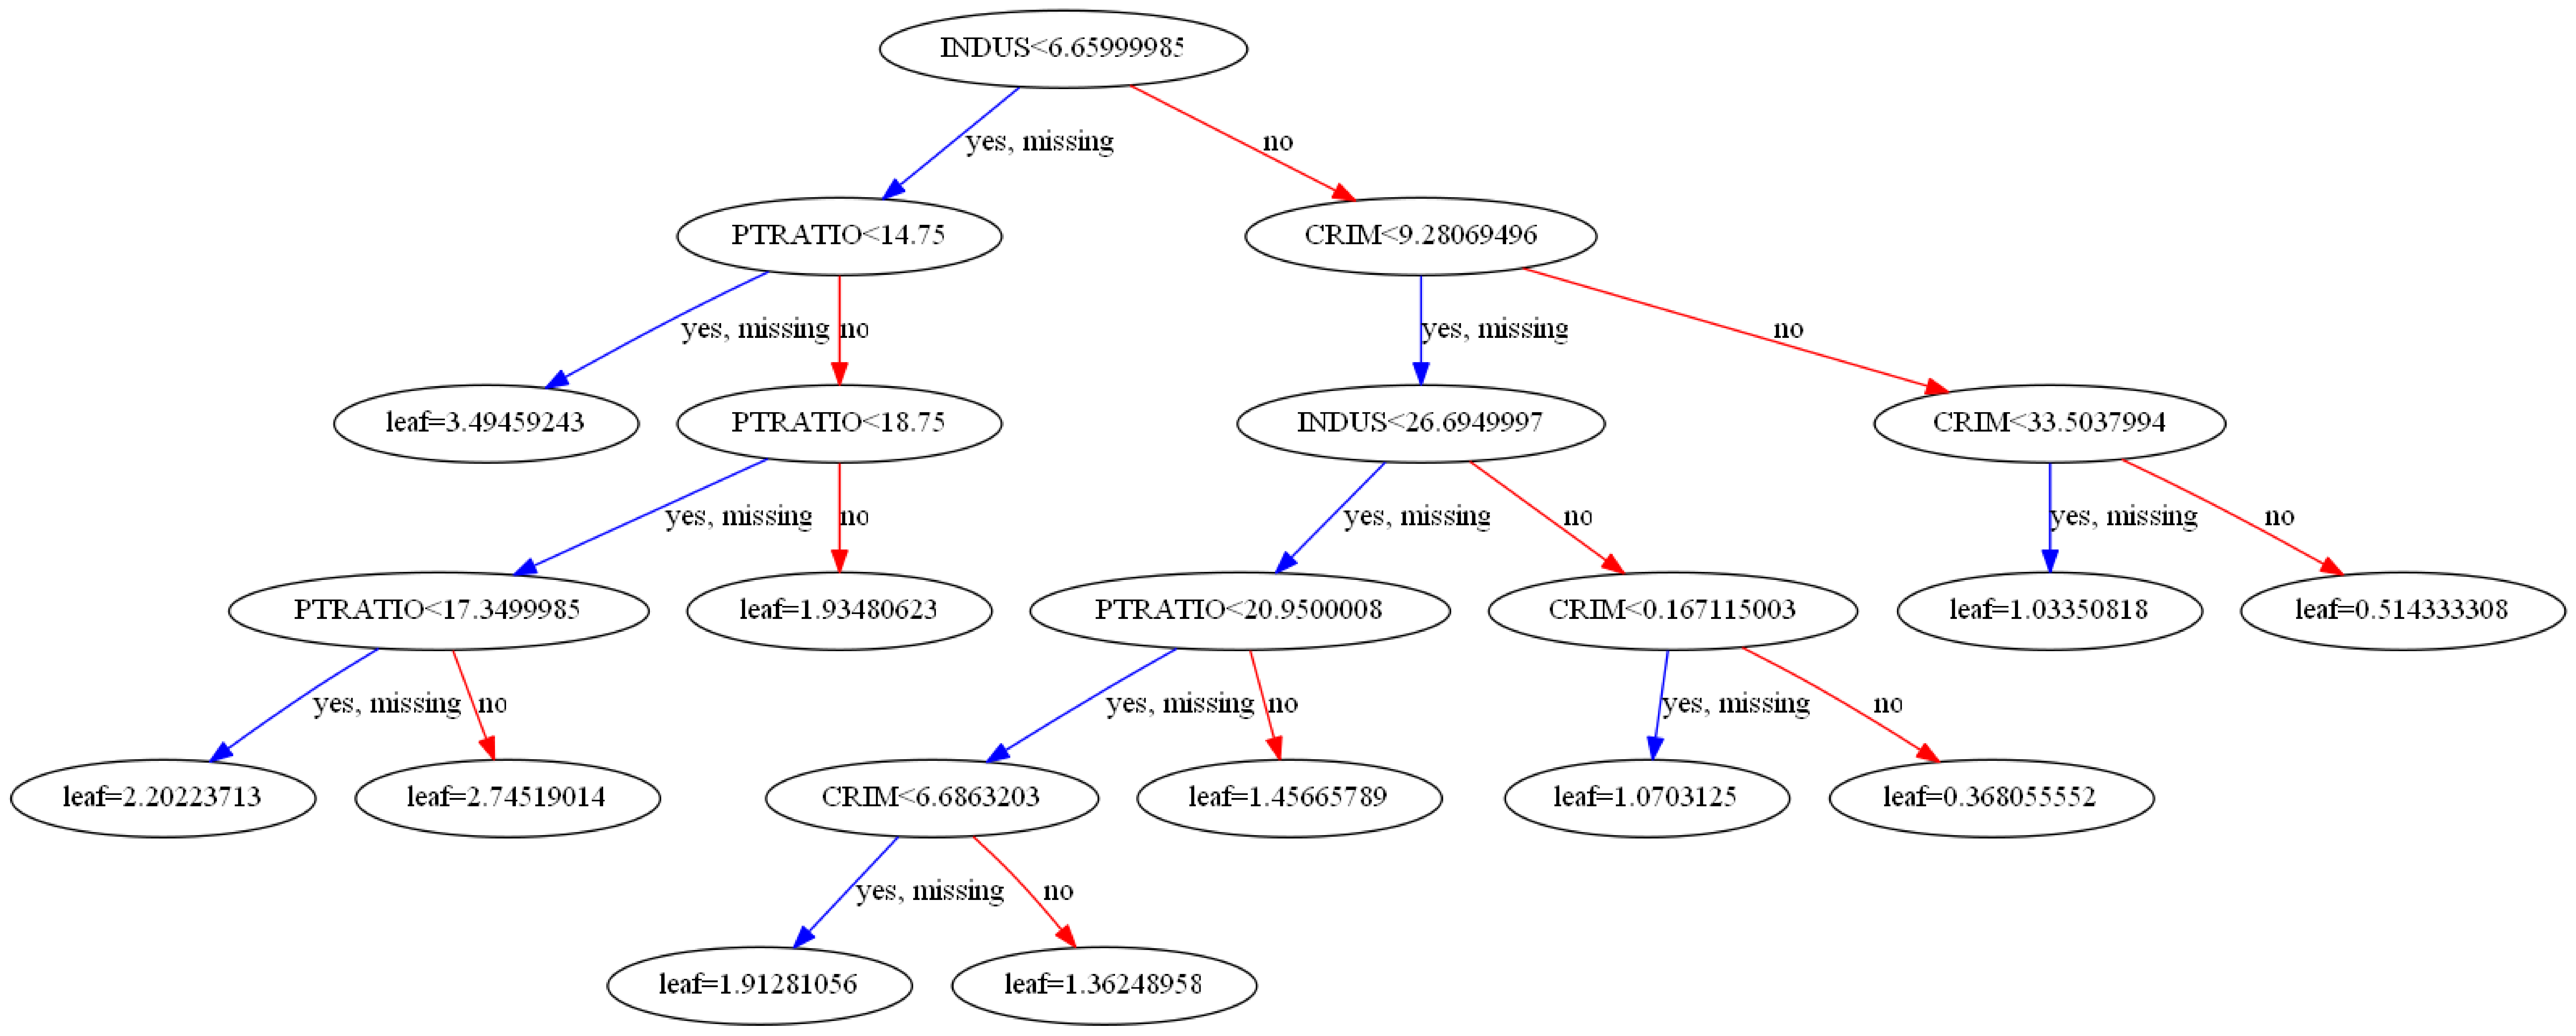

In [58]:
xgb.plot_tree(xg_reg,num_trees=1)
plt.rcParams['figure.figsize'] = [150, 110]
plt.show()

### Feature-Importance  / Welche Attribute haben den größten Einfluss auf die Vorhersage

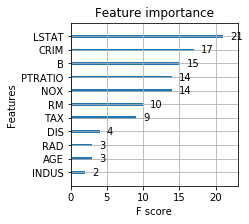

In [66]:
xgb.plot_importance(xg_reg)
plt.rcParams['figure.figsize'] = [2, 2]
plt.show()

### Modell bewerten / Scoring

In [ ]:
# Score-Wert für Trainingsdaten ermitteln
print("Training set score: {:.2f}".format(lr.score(X_train, y_train)))


# Score-Wert für Testaten entwickeln
print("Test set score: {:.2f}".format(lr.score(X_test, y_test)))
                                            #Hoher Trainingsdaten-Score-Wert 
                                            #aber schlechter Testdaten-Score-Wert  -> offenbar übertrainiert

### Ridge regression  / Optimierung des Modells 

*Ridge-Regression* versucht Overfitting durch Regularisierung zu vermeiden.   
Die Koeffizienten (im Prinzip die Gewichte der Attribute) werden dabei so klein wie möglich gewält.   
Der Einfluss der einzelnen Attribute wird damit so gering wie möglich gehalten.  

Dieser Vorgang kann durch den sog. **alpha-Parameter** gesteuert werden:    
 &nbsp;&nbsp; &nbsp;&nbsp; Default = 1, erhöht man ihn, werden die Koeffizienten noch stärker gegen Null "gedrückt".

In [12]:
from sklearn.linear_model import Ridge

In [13]:
ridge = Ridge().fit(X_train, y_train)                # alpha-Paramter auf 1 (Default)
print("Training set score: {:.2f}".format(ridge.score(X_train, y_train)))
print("Test set score: {:.2f}".format(ridge.score(X_test, y_test)))

Training set score: 0.89
Test set score: 0.75


In [14]:
ridge10 = Ridge(alpha=10).fit(X_train, y_train)     # alpha-Paramter auf 10 
print("Training set score: {:.2f}".format(ridge10.score(X_train, y_train)))
print("Test set score: {:.2f}".format(ridge10.score(X_test, y_test)))

Training set score: 0.79
Test set score: 0.64


In [15]:
ridge01 = Ridge(alpha=0.1).fit(X_train, y_train)   # alpha-Paramter auf 0.1 
print("Training set score: {:.2f}".format(ridge01.score(X_train, y_train)))
print("Test set score: {:.2f}".format(ridge01.score(X_test, y_test)))

Training set score: 0.93
Test set score: 0.77


Die folgende Graphik stellt die Residuen dar.  
Und zwar jeweils mit verschieden gewählten alpha-Parametern.  

Man erkennt, dass bei alpha = 10 (gelbe Dreiecke) die Residuen sehr eng an der optimalen Modell-Linie liegen.

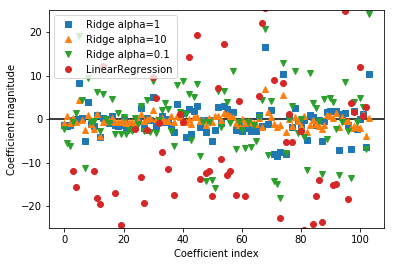

In [18]:
plt.plot(ridge.coef_, 's', label="Ridge alpha=1")
plt.plot(ridge10.coef_, '^', label="Ridge alpha=10")
plt.plot(ridge01.coef_, 'v', label="Ridge alpha=0.1")

plt.plot(lr.coef_, 'o', label="LinearRegression")
plt.xlabel("Coefficient index")
plt.ylabel("Coefficient magnitude")
xlims = plt.xlim()
plt.hlines(0, xlims[0], xlims[1])
plt.xlim(xlims)
plt.ylim(-25, 25)
plt.legend()

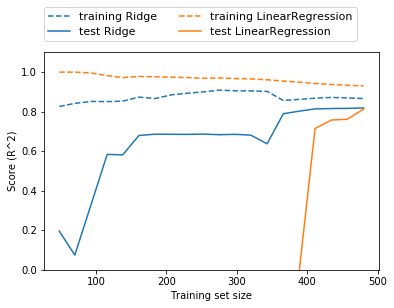

In [19]:
mglearn.plots.plot_ridge_n_samples()

### Lasso regression  

Die Lasso-Methode funktioniert ähnlich wie Ridge-Regression. Allerdings können die Koeffizienten (also Gewichte) einzelner Attribute auch Null werden. Damit fallen Attribute mit schwachem Einfluss auf das Gesamtergebnis 
(y, Zielvariable) komplett aus der Betrachung raus.  
**Parameter:**      
alpha (Default 1): --> reduzieren zum Minimieren des Underfitting    
 &nbsp;&nbsp; -> es sollen mehr Attribute berücksichtigt werden  
  &nbsp;&nbsp; &nbsp;&nbsp;                      Erhöhen hat den umgekehrten Effekt  
 max_iter:   --> maximale Anzahl der Iterationen bis zur Festellung des Ergebnisses                       

In [33]:
from sklearn.linear_model import Lasso

lasso = Lasso().fit(X_train, y_train)
print("Training set score: {:.2f}".format(lasso.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lasso.score(X_test, y_test)))
print("Number of features used:", np.sum(lasso.coef_ != 0))     # Anzeigen der Anzahl der berücksichtigten Attribute

Training set score: 0.72
Test set score: 0.55
Number of features used: 11


In [34]:
# Reduzieren von alpha. Erhöhen von max_iter um einer Warnung des System aus dem Weg zu gehen
lasso001 = Lasso(alpha=0.01, max_iter=100000).fit(X_train, y_train)
print("Training set score: {:.2f}".format(lasso001.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lasso001.score(X_test, y_test)))
print("Number of features used:", np.sum(lasso001.coef_ != 0))

Training set score: 0.77
Test set score: 0.63
Number of features used: 13


In [23]:
# Noch stärkeres Reduzieren von alpha. Erhöhen von max_iter
lasso00001 = Lasso(alpha=0.0001, max_iter=100000).fit(X_train, y_train)
print("Training set score: {:.2f}".format(lasso00001.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lasso00001.score(X_test, y_test)))
print("Number of features used:", np.sum(lasso00001.coef_ != 0))

Training set score: 0.95
Test set score: 0.64
Number of features used: 96
